Begin by configuring the Live Reveal slideshow.

In [1]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/usr/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
    'theme': 'serif',
    'transition': 'slide',
    'start_slideshow_at': 'selected',
    'slideNumber': False,
});

<h1 align="center">Point Cloud Filters & Pipelines in PDAL</h1>
<h2 align="center">FOSS4G 2017, 18 August 2017</h2>
<br>
<h3 align="center">*Bradley J Chambers, DigitalGlobe*</h3>
<img src="./figures/pdal_logo.png" width="10%" align="right">

<h2 align="center">Overview</h2>
* Python Package
* Docker Images
* IPython/Jupyter Examples
* Status of PCL Filters
* Filter-only Pipelines

<h2 align="center">Python Package</h2>

The PDAL Python [package](https://pypi.python.org/pypi/PDAL) can be installed via [pip](https://pip.pypa.io/en/stable/).

`pip install pdal`

Once installed, simply

In [108]:
import pdal

<h2 align="center">Docker Image</h2>
* Existing PDAL image (`pdal/pdal:latest`) approaches 4 GB
* Images building plugins on top of the PDAL base image can grow even larger

<table style="font-size:100%;">
  <tr>
    <th style="text-align:left;">Image</th>
    <th style="text-align:left;">Tag</th>
    <th style="text-align:left;">Size</th>
  </tr>
  <tr>
    <td style="text-align:left;">pdal/dependencies</td>
    <td style="text-align:left;">1.5</td>
    <td style="text-align:left;">3.1GB</td>
  </tr>
  <tr>
    <td style="text-align:left;">pdal/dependencies</td>
    <td style="text-align:left;">latest</td>
    <td style="text-align:left;">3.31GB</td>
  </tr>
  <tr>
    <td style="text-align:left;">pdal/pdal</td>
    <td style="text-align:left;">1.5</td>
    <td style="text-align:left;">3.67GB</td>
  </tr>
  <tr>
    <td style="text-align:left;">pdal/pdal</td>
    <td style="text-align:left;">latest</td>
    <td style="text-align:left;">3.67GB</td>
  </tr>
</table>

<h2 align="center">Alpine Docker Image</h2>
* WIP
* Prototype Alpine image with ~80% of the plugins is currently under 400 MB

<table style="font-size:100%;">
  <tr>
    <th style="text-align:left;">Image</th>
    <th style="text-align:left;">Tag</th>
    <th style="text-align:left;">Size</th>
  </tr>
  <tr>
    <td style="text-align:left;">pdal/dependencies</td>
    <td style="text-align:left;">alpine</td>
    <td style="text-align:left;">1.07GB</td>
  </tr>
  <tr>
    <td style="text-align:left;">pdal/pdal</td>
    <td style="text-align:left;">alpine</td>
    <td style="text-align:left;">365MB</td>
  </tr>
</table>

<h2 align="center">`pdal-notebook` Docker Image</h2>
* `pdal/pdal` image has existed for some time
* Rational for `pdal-notebook` is to layer on all the necessary pieces to be able to use PDAL and the PDAL python package within a Jupyter notebook, with some extra goodies

* Need to finalize `pdal-notebook`. It seems like a better long term solution than the `learning-pdal` solution that I'm using currently.
* These slides and other notebooks perhaps should make up the `learning-pdal` repo, with `pdal-notebook` standing separately.

<h2 align="center">IPython/Jupyter Examples</h2>
The remainder of the presentation will leverage our `pdal-notebook` and present examples in the context of the PDAL Python package (though CLI samples will be provided as well).

<h3 align="center">Creating a Pipeline</h3>

Start by importing the PDAL package.

In [65]:
from __future__ import print_function

In [66]:
import pdal

Define the pipeline JSON.

In [67]:
json = u'''
{
  "pipeline":[
    "./data/isprs/samp11-utm.laz"
  ]
}'''

This JSON description of the pipeline is passed directly to the `pdal.Pipeline()` constructor.

In [68]:
p = pdal.Pipeline(json)

<h3 align="center">Validating & Executing the Pipeline</h3>

We can check that we have defined a valid pipeline.

In [69]:
valid = p.validate()
print('Is pipeline valid? %s' % valid)

Is pipeline valid? True


Next, we execute the pipeline.

In [70]:
count = p.execute()
print('Pipeline processed %d points.' % count)

Pipeline processed 38010 points.


We see that 1065 points have been processed via the pipeline. These points are accessible as a `numpy.ndarray`. It is possible to have multiple PointViews flowing through the pipeline, in which case, there could be multiple arrays. Here, we access the first (and only) array.

In [71]:
arr = p.arrays[0]
print('Pipeline contains %d array(s) of type %s.' % (len(p.arrays), type(arr)))

Pipeline contains 1 array(s) of type <type 'numpy.ndarray'>.


<h3 align="center">Use the `ndarray`</h3>

While it is possible to work with the `numpy.ndarray` directly, for example printing the first record

In [72]:
print(arr[0])

(512743.63, 5403547.33, 308.68, 0, 1, 1, 0, 0, 2, 0.0, 0, 0)


printing the first 10 X values

In [73]:
print(arr['X'][:10])

[ 512743.63  512743.62  512743.61  512743.6   512743.6   512741.5   512741.5
  512741.49  512741.48  512741.47]


or computing the mean of all Z values

In [74]:
print(arr['Z'].mean())

356.17143357


<h3 align="center">Or Pandas!</h3>

We can also leverage other Python packages like Pandas to read the data.

In [75]:
import pandas as pd
samp11 = pd.DataFrame(arr)

<h3 align="center">Print Records</h3>

In [76]:
samp11.head()

X           Y       Z  Intensity  ReturnNumber  NumberOfReturns  \
0  512743.63  5403547.33  308.68          0             1                1   
1  512743.62  5403547.33  308.70          0             1                1   
2  512743.61  5403547.33  308.72          0             1                1   
3  512743.60  5403547.34  308.68          0             1                1   
4  512743.60  5403547.33  308.73          0             1                1   

   ScanDirectionFlag  EdgeOfFlightLine  Classification  ScanAngleRank  \
0                  0                 0               2            0.0   
1                  0                 0               2            0.0   
2                  0                 0               2            0.0   
3                  0                 0               2            0.0   
4                  0                 0               2            0.0   

   UserData  PointSourceId  
0         0              0  
1         0              0  
2         0              0  
3         0              0  
4         0              0

In [77]:
samp11.tail()

X           Y       Z  Intensity  ReturnNumber  \
38005  512834.60  5403818.01  375.55          1             1   
38006  512834.66  5403819.08  374.56          1             1   
38007  512834.76  5403828.06  374.41          1             1   
38008  512834.76  5403842.65  377.74          1             1   
38009  512834.48  5403849.42  385.57          1             1   

       NumberOfReturns  ScanDirectionFlag  EdgeOfFlightLine  Classification  \
38005                1                  0                 0               0   
38006                1                  0                 0               0   
38007                1                  0                 0               0   
38008                1                  0                 0               0   
38009                1                  0                 0               0   

       ScanAngleRank  UserData  PointSourceId  
38005            0.0         0              0  
38006            0.0         0              0  
38007            0.0         0              0  
38008            0.0         0              0  
38009            0.0         0              0

<h3 align="center">Summarize</h3>

In [78]:
samp11.describe()

X             Y             Z     Intensity  ReturnNumber  \
count   38010.000000  3.801000e+04  38010.000000  38010.000000       38010.0   
mean   512767.010570  5.403708e+06    356.171434      0.426835           1.0   
std        38.570375  8.587360e+01     29.212680      0.494624           0.0   
min    512700.870000  5.403547e+06    295.250000      0.000000           1.0   
25%    512733.530000  5.403645e+06    329.060000      0.000000           1.0   
50%    512766.940000  5.403705e+06    356.865000      0.000000           1.0   
75%    512799.900000  5.403790e+06    385.860000      1.000000           1.0   
max    512834.760000  5.403850e+06    404.080000      1.000000           1.0   

       NumberOfReturns  ScanDirectionFlag  EdgeOfFlightLine  Classification  \
count          38010.0            38010.0           38010.0    38010.000000   
mean               1.0                0.0               0.0        1.146330   
std                0.0                0.0               0.0        0.989249   
min                1.0                0.0               0.0        0.000000   
25%                1.0                0.0               0.0        0.000000   
50%                1.0                0.0               0.0        2.000000   
75%                1.0                0.0               0.0        2.000000   
max                1.0                0.0               0.0        2.000000   

       ScanAngleRank  UserData  PointSourceId  
count        38010.0   38010.0        38010.0  
mean             0.0       0.0            0.0  
std              0.0       0.0            0.0  
min              0.0       0.0            0.0  
25%              0.0       0.0            0.0  
50%              0.0       0.0            0.0  
75%              0.0       0.0            0.0  
max              0.0       0.0            0.0

<h3 align="center">Analyze</h3>

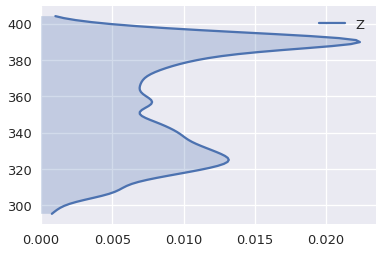

In [79]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
sns.set_context("talk")
sns.kdeplot(samp11['Z'], cut=0, shade=True, vertical=True);

<h3 align="center">CLI Access</h3>

In [80]:
!pdal

Usage:
  pdal <options>
  pdal <command> <command options>
  --command        The PDAL command
  --debug          Sets the output level to 3 (option deprecated)
  --verbose, -v    Sets the output level (0-8)
  --drivers        List available drivers
  --help, -h       Display help text
  --list-commands  List available commands
  --version        Show program version
  --options        Show options for specified driver (or 'all')
  --log            Log filename (accepts stderr, stdout, stdlog, devnull as
      special cases)

The following commands are available:
   - kernels.cpd
   - kernels.delta
   - kernels.density
   - kernels.diff
   - kernels.ground
   - kernels.hausdorff
   - kernels.info
   - kernels.merge
   - kernels.pcl
   - kernels.pipeline
   - kernels.random
   - kernels.smooth
   - kernels.sort
   - kernels.split
   - kernels.tindex
   - kernels.translate
See http://pdal.io/apps/ for more detail


<h3 align="center">Using JQ to Parse `pdal info`</h3>

In [81]:
!apt-get update && apt-get install -y --fix-missing --no-install-recommends jq

Hit:1 http://archive.ubuntu.com/ubuntu xenial InRelease                        
Get:2 http://security.ubuntu.com/ubuntu xenial-security InRelease [102 kB]     
Hit:3 http://ppa.launchpad.net/ubuntugis/ubuntugis-unstable/ubuntu xenial InRelease
Hit:4 http://ppa.launchpad.net/webupd8team/java/ubuntu xenial InRelease        
Get:5 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [102 kB]       
Get:6 http://archive.ubuntu.com/ubuntu xenial-backports InRelease [102 kB]     
Fetched 306 kB in 1s (178 kB/s)  
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
jq is already the newest version (1.5+dfsg-1).
The following package was automatically installed and is no longer required:
  libgeos-3.5.0
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


In [82]:
!pdal info ./data/isprs/samp11-utm.laz | jq .stats.bbox.native.bbox

{
  "maxx": 512834.76,
  "maxy": 5403849.99,
  "maxz": 404.08,
  "minx": 512700.87,
  "miny": 5403547.26,
  "minz": 295.25
}


<h3 align="center">Searching Near a Point</h3>

In [83]:
med = samp11[['X','Y','Z']].median()
print(med)

X     512766.940
Y    5403705.460
Z        356.865
dtype: float64


In [84]:
from scipy import spatial
tree = spatial.cKDTree(samp11[['X','Y','Z']])
dists, idx = tree.query(med, k=3)
print(dists)

[ 0.6213091   1.37645378  1.51757207]


In [85]:
samp11.iloc[idx]

X           Y       Z  Intensity  ReturnNumber  \
31897  512767.16  5403706.02  357.02          1             1   
31881  512767.93  5403706.29  356.39          1             1   
31972  512765.75  5403706.19  356.27          1             1   

       NumberOfReturns  ScanDirectionFlag  EdgeOfFlightLine  Classification  \
31897                1                  0                 0               0   
31881                1                  0                 0               0   
31972                1                  0                 0               0   

       ScanAngleRank  UserData  PointSourceId  
31897            0.0         0              0  
31881            0.0         0              0  
31972            0.0         0              0

<h3 align="center">DimRange</h3>
A [DimRange](https://www.pdal.io/stages/filters.range.html#ranges) is a
* named dimension, and 
* range of values.

Bounds can be inclusive (`[]`) or exclusive (`()`).

Ranges can be negated (`!`).

For example,
* `Z[10:]` selects all points with Z greater than or equal to 10
* `Classification[2:2]` selects all points with classification of 2
* `Red!(20:40]` selects all points with red values less than or equal to 20 as well as those with values greater than 40

Commonly used in both `filters.range`

In [118]:
json = u'''
{
  "pipeline":[
    {
      "type":"filters.range",
      "limits":"Z[10:]"
    }
  ]
}
'''

and `filters.assign`.

In [119]:
json = u'''
{
  "pipeline":[
    {
      "type":"filters.assign",
      "assignment":"Classification[:]=0"
    }
  ]
}
'''

<h3 align="center">Ignore</h3>
Two of PDAL's ground segmentation filters, `filters.pmf` and `filters.smrf`, can now specify a `DimRange` via the `ignore` parameter to specify points that should be ignored during processing.

A common use case for this is to ignore points that have been previously marked as noise. In prior versions of PDAL, we had to filter noise out completely prior to ground segmentation.

In [121]:
json = u'''
{
  "pipeline":[
    {
      "type":"filters.range",
      "limits":"Classification![7:7]"
    },
    {
      "type":"filters.smrf"
    }
  ]
}
'''

Which of course means those noise points are gone forever.

Now, with `ignore` we can

In [122]:
json = u'''
{
  "pipeline":[
    {
      "type":"filters.smrf",
      "ignore":"Classification[7:7]"
    }
  ]
}
'''

Which allows us to retain noise points without having them impact the ground segmentation step.

<h3 align="center">Height Above Ground</h3>

To compute `HeightAboveGround` we will use two PDAL filters, first [SMRF](https://pdal.io/stages/filters.smrf.html) to segment ground and non-ground returns, and [HAG](https://pdal.io/stages/filters.hag.html) to estimate the `HeightAboveGround` using the return information.

In [86]:
json = u'''
{
  "pipeline":[
    "./data/isprs/samp11-utm.laz",
    {
      "type":"filters.smrf"
    },
    {
      "type":"filters.hag"
    }
  ]
}'''

p = pdal.Pipeline(json)
count = p.execute()
df = pd.DataFrame(p.arrays[0])

Note that this is equivalent to

In [87]:
!pdal translate ./data/isprs/samp11-utm.laz ./data/foo.laz smrf hag

Recall the kernel density of raw elevations...

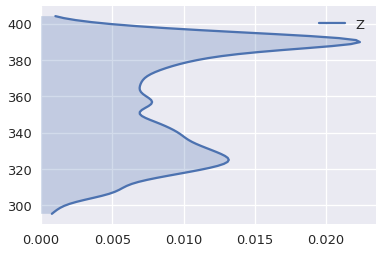

In [88]:
sns.kdeplot(df['Z'], cut=0, shade=True, vertical=True);

Now, consider the `HeightAboveGround` dimension.

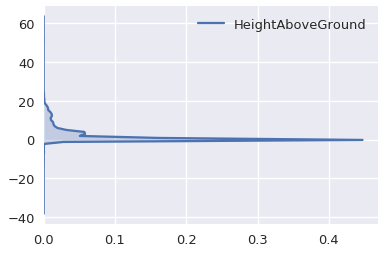

In [89]:
sns.kdeplot(df['HeightAboveGround'], cut=0, shade=True, vertical=True);

In [90]:
json = u'''
{
  "pipeline":[
    "./data/isprs/samp11-utm.laz",
    {
      "type":"filters.smrf"
    },
    {
      "type":"filters.hag"
    },
    {
      "type":"filters.range",
      "limits":"Classification[1:1]"
    }
  ]
}'''

p = pdal.Pipeline(json)
count = p.execute()
df = pd.DataFrame(p.arrays[0])

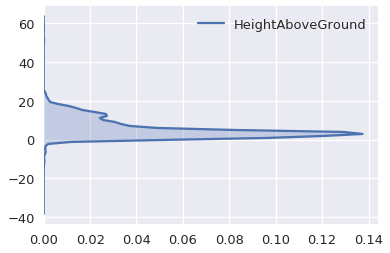

In [91]:
sns.kdeplot(df['HeightAboveGround'], cut=0, shade=True, vertical=True);

In [92]:
json = u'''
{
  "pipeline":[
    "./data/isprs/samp11-utm.laz",
    {
      "type":"filters.elm"
    },
    {
      "type":"filters.range",
      "limits":"Classification![7:7]"
    },
    {
      "type":"filters.smrf"
    },
    {
      "type":"filters.hag"
    },
    {
      "type":"filters.range",
      "limits":"Classification[1:1]"
    }
  ]
}'''

p = pdal.Pipeline(json)
count = p.execute()
df = pd.DataFrame(p.arrays[0])

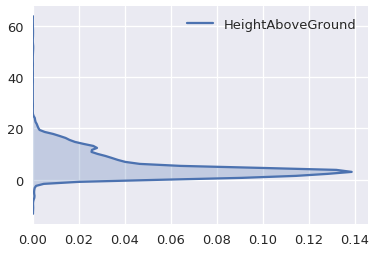

In [93]:
sns.kdeplot(df['HeightAboveGround'], cut=0, shade=True, vertical=True);

In [94]:
df[['HeightAboveGround']].describe()

HeightAboveGround
count       15607.000000
mean            5.467956
std             5.006438
min           -13.280000
25%             2.110000
50%             3.870000
75%             7.810000
max            63.700000

<h3 align="center">Removing Noise</h3>

This tutorial is meant to walk through the use of and theory behind PDAL's `outlier` filter.

- Statistical Outlier Filter
- Radius Outlier Filter

<h4 align="center">Statistical Outlier Filter</h4>

The basic idea of a statistical outlier removal has been implemented in both [PCL](http://www.pointclouds.org/documentation/tutorials/statistical_outlier.php#statistical-outlier-removal) and [PDAL](https://www.pdal.io/stages/filters.outlier.html).

We begin by computing the mean distance $\mu_i$ to each of the $k$ nearest neighbors for each point.

Next, we use the pointwise mean distances to compute the global mean

$$\overline{\mu} = \frac{1}{N} \sum_{i=1}^N \mu_i$$

and standard deviation

$$\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (\mu_i - \overline{\mu})^2}$$

A threshold is then formed by

$$\overline{\mu} + 3\sigma$$

Any point whose mean distance $\mu_i$ exceeds this threshold is then labeled as noise.

Let's begin by iterating through our DataFrame, keeping track of the mean distance to our eight nearest neighbors.

In [95]:
import numpy as np
dists = []
for _, point in samp11[['X','Y','Z']].iterrows():
    dist, _ = tree.query(point, k=9)
    dists = np.append(dists, dist[1:].mean())

The KDE plot of the mean distances looks something like this.

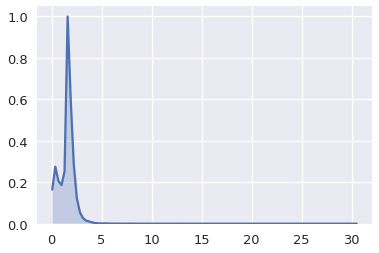

In [96]:
sns.kdeplot(dists, cut=0, shade=True);

Now, we compute the threshold as described.

In [97]:
threshold = dists.mean()+3*dists.std()
noise = dists[dists>threshold]
signal = dists[dists<=threshold]
print(noise.size, "points detected with a "
      "mean distance exceeding the global threshold of", threshold)

241 points detected with a mean distance exceeding the global threshold of 3.81763516967


Now our KDE plot of mean distances looks like this.

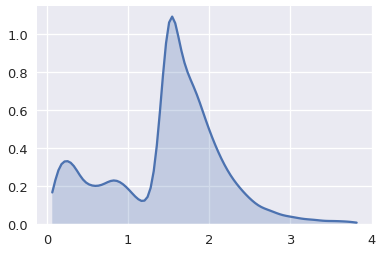

In [98]:
sns.kdeplot(signal, cut=0, shade=True);

In [99]:
!pdal translate ./data/isprs/samp11-utm.laz ./data/foo.laz assign outlier \
  --filters.assign.assignment="Classification[:]=0" \
  --filters.outlier.method="statistical" \
  --filters.outlier.multiplier=3 \
  --filters.outlier.mean_k=8 \
  --verbose 5

(pdal translate filters.outlier Debug) 		Labeled 241 outliers as noise!
(pdal translate writers.las Debug) Wrote 38010 points to the LAS file


In [100]:
json = u'''
{
  "pipeline":[
    "./data/isprs/samp11-utm.laz",
    {
      "type":"filters.assign",
      "assignment":"Classification[:]=0"
    },
    {
      "type": "filters.outlier",
      "method": "statistical",
      "multiplier": 3,
      "mean_k": 8
    }
  ]
}'''

p = pdal.Pipeline(json)
p.loglevel = 8
p.execute()
print(p.log)

(pypipeline filters.outlier Debug) 		Labeled 241 outliers as noise!



In [132]:
json = u'''
{
  "pipeline": [
    "./data/isprs/samp11-utm.laz",
    {
      "type": "filters.smrf"
    },
    {
      "type": "filters.hag"
    },
    {
      "type": "filters.range",
      "limits": "HeightAboveGround[3:]"
    },
    {
      "type": "filters.cluster",
      "tolerance": 3
    },
    {
      "type": "filters.groupby",
      "dimension": "ClusterID"
    },
    {
      "type": "filters.locate",
      "dimension": "HeightAboveGround",
      "minmax": "max"
    },
    {
      "type": "filters.merge"
    },
    {
      "type": "filters.range",
      "limits": "HeightAboveGround[20:]"
    }
  ]
}

'''
p = pdal.Pipeline(json)
p.execute()
vo = pd.DataFrame(p.arrays[0], columns=['X','Y','Z','HeightAboveGround'])

In [133]:
vo.describe()

X             Y           Z  HeightAboveGround
count      15.000000  1.500000e+01   15.000000          15.000000
mean   512799.513333  5.403632e+06  352.667333          38.212000
std        23.111817  4.812817e+01   22.661835          16.576486
min    512730.790000  5.403557e+06  317.300000          20.050000
25%    512795.435000  5.403623e+06  333.970000          21.895000
50%    512798.290000  5.403624e+06  354.110000          38.450000
75%    512813.460000  5.403626e+06  367.255000          54.255000
max    512831.280000  5.403739e+06  401.930000          63.700000

In [134]:
vo

X           Y       Z  HeightAboveGround
0   512794.22  5403576.38  317.30              21.99
1   512827.97  5403630.85  329.92              24.45
2   512786.89  5403626.56  366.60              58.15
3   512811.06  5403612.84  326.88              20.26
4   512792.11  5403626.03  368.89              59.78
5   512797.05  5403624.26  338.02              28.91
6   512796.65  5403624.90  350.39              41.28
7   512798.29  5403625.87  361.53              52.31
8   512797.34  5403623.67  347.56              38.45
9   512798.47  5403623.67  354.11              44.89
10  512798.73  5403624.20  365.42              56.20
11  512831.28  5403557.39  323.52              20.96
12  512815.86  5403621.44  370.03              63.70
13  512815.99  5403739.10  367.91              20.05
14  512730.79  5403738.80  401.93              21.80

<h2 align="center">Fun Things</h2>

In [139]:
!pdal info ./data/isprs/samp11-utm.laz

{
  "filename": ".\/data\/isprs\/samp11-utm.laz",
  "pdal_version": "1.5.0 (git-version: cb82e6)",
  "stats":
  {
    "bbox":
    {
      "EPSG:4326":
      {
        "bbox":
        {
          "maxx": 9.174733985,
          "maxy": 48.78751773,
          "maxz": 404.08,
          "minx": 9.172901843,
          "miny": 48.78479165,
          "minz": 295.25
        },
        "boundary": {
   "coordinates" : [
      [
         [ 9.1729018399999998, 48.784794400000003 ],
         [ 9.1729111999999997, 48.787517729999998 ],
         [ 9.1747339799999992, 48.787514979999997 ],
         [ 9.1747245300000007, 48.784791650000003 ],
         [ 9.1729018399999998, 48.784794400000003 ]
      ]
   ],
   "type" : "Polygon"
}

      },
      "native":
      {
        "bbox":
        {
          "maxx": 512834.76,
          "maxy": 5403849.99,
          "maxz": 404.08,
          "minx": 512700.87,
          "miny": 5403547.26,
          "minz": 295.25
        },
        "boundary": {
   "coordinate

In [140]:
!pdal info ./data/isprs/samp11-utm.laz --boundary

{
  "boundary":
  {
    "area": 49185.59593,
    "avg_pt_per_sq_unit": 4.332144732,
    "avg_pt_spacing": 1.137548793,
    "boundary": "MULTIPOLYGON (((512735.34793786 5403532.98504758, 512843.01474565 5403547.33000000, 512834.73268351 5403877.26390560, 512718.78381359 5403877.26390560, 512685.65556504 5403848.57400076, 512685.65556504 5403561.67495242, 512735.34793786 5403532.98504758)))",
    "boundary_json": { "type": "MultiPolygon", "coordinates": [ [ [ [ 512735.34793786, 5403532.98504758 ], [ 512843.01474565, 5403547.33 ], [ 512834.73268351, 5403877.2639056 ], [ 512718.78381359, 5403877.2639056 ], [ 512685.65556504, 5403848.57400076 ], [ 512685.65556504, 5403561.67495242 ], [ 512735.34793786, 5403532.98504758 ] ] ] ] },
    "density": 0.7727872211,
    "edge_length": 0,
    "estimated_edge": 28.68990483,
    "hex_offsets": "MULTIPOINT (0 0, -8.28206 14.345, 0 28.6899, 16.5641 28.6899, 24.8462 14.345, 16.5641 0)",
    "sample_size": 5000,
    "threshold": 15
  },
  "filename": ".\/

In [141]:
!pdal info ./data/isprs/samp11-utm.laz --boundary | jq -r .boundary.boundary

MULTIPOLYGON (((512735.34793786 5403532.98504758, 512843.01474565 5403547.33000000, 512834.73268351 5403877.26390560, 512718.78381359 5403877.26390560, 512685.65556504 5403848.57400076, 512685.65556504 5403561.67495242, 512735.34793786 5403532.98504758)))


In [137]:
!pdal translate ./data/isprs/CSite1_orig-utm.laz ./data/foo.laz crop --verbose 5 \
    --filters.crop.polygon="$(pdal info ./data/isprs/samp11-utm.laz --boundary | jq -r .boundary.boundary)"

(pdal translate writers.las Debug) Wrote 95798 points to the LAS file


<h2 align="center">Status of PCL Filters</h2>
* Native PDAL variants of PCL Plugin filters

<table style="font-size:100%;">
  <tr>
    <th style="text-align:left;">Old (PCL)</th>
    <th style="text-align:left;">New (PDAL)</th>
  </tr>
  <tr>
    <td style="text-align:left;">`filters.ground`</td>
    <td style="text-align:left;">`filters.pmf`</td>
  </tr>
  <tr>
    <td style="text-align:left;">`filters.radiusoutlier`</td>
    <td style="text-align:left;">`filters.outlier`</td>
  </tr>
  <tr>
    <td style="text-align:left;">`filters.statisticaloutlier`</td>
    <td style="text-align:left;">`filters.outlier`</td>
  </tr>
  <tr>
    <td style="text-align:left;">`filters.height`</td>
    <td style="text-align:left;">`filters.hag`</td>
  </tr>
  <tr>
    <td style="text-align:left;">`filters.dartsample`</td>
    <td style="text-align:left;">`filters.sample`</td>
  </tr>
</table>

* PCL JSON specifcation bumped to v0.2 → easier to embed in PDAL JSON
* Removed the PCL Visualizers

In [32]:
import json
with open('./pclblock.json') as json_data:
    d = json.load(json_data)
    print json.dumps(d, indent=2)

{
  "pipeline": [
    {
      "type": "filters.pclblock", 
      "methods": [
        {
          "setLeafSize": {
            "y": 2.0, 
            "x": 2.0, 
            "z": 2.0
          }, 
          "name": "VoxelGrid"
        }
      ]
    }
  ]
}


In [33]:
!pdal translate ./data/isprs/samp11-utm.laz ./data/foo.laz --json ./pclblock.json --verbose 5

(pdal translate Debug) Plugin search path: '.'
(pdal translate Debug) Plugin search path: './lib'
(pdal translate Debug) Plugin search path: '../lib'
(pdal translate Debug) Plugin search path: './bin'
(pdal translate Debug) Plugin search path: '../bin'
(pdal translate Debug) Plugin search path: '/usr/lib'
(pdal translate Debug) Attempting to load plugin '/usr/lib/libpdal_plugin_filter_pclblock.so'.
(pdal translate Debug) Loaded plugin '/usr/lib/libpdal_plugin_filter_pclblock.so'.
(pdal translate Debug) Initialized plugin '/usr/lib/libpdal_plugin_filter_pclblock.so'.
(pdal translate filters.pclblock Debug) 		Process PCLBlock...
	leaf size: 2.000000, 2.000000, 2.000000
(pdal translate writers.las Warning) ./data/foo.laz: Found invalid value of '0' for point's return number.
(pdal translate writers.las Warning) ./data/foo.laz: Found invalid value of '0' for point's number of returns.
(pdal translate writers.las Debug) Wrote 16721 points to the LAS file


In [57]:
%matplotlib inline
import pdal
import matplotlib.pyplot as plt
import numpy as np
json = u'''
{
  "pipeline":[
    "./data/foo.laz"
  ]
}'''

p = pdal.Pipeline(json)
p.validate()
count = p.execute()
vg = p.arrays[0]
    
json = u'''
{
  "pipeline":[
    "./data/isprs/samp11-utm.laz"
  ]
}'''

p = pdal.Pipeline(json)
p.validate()
count = p.execute()
before = p.arrays[0]
after = vg

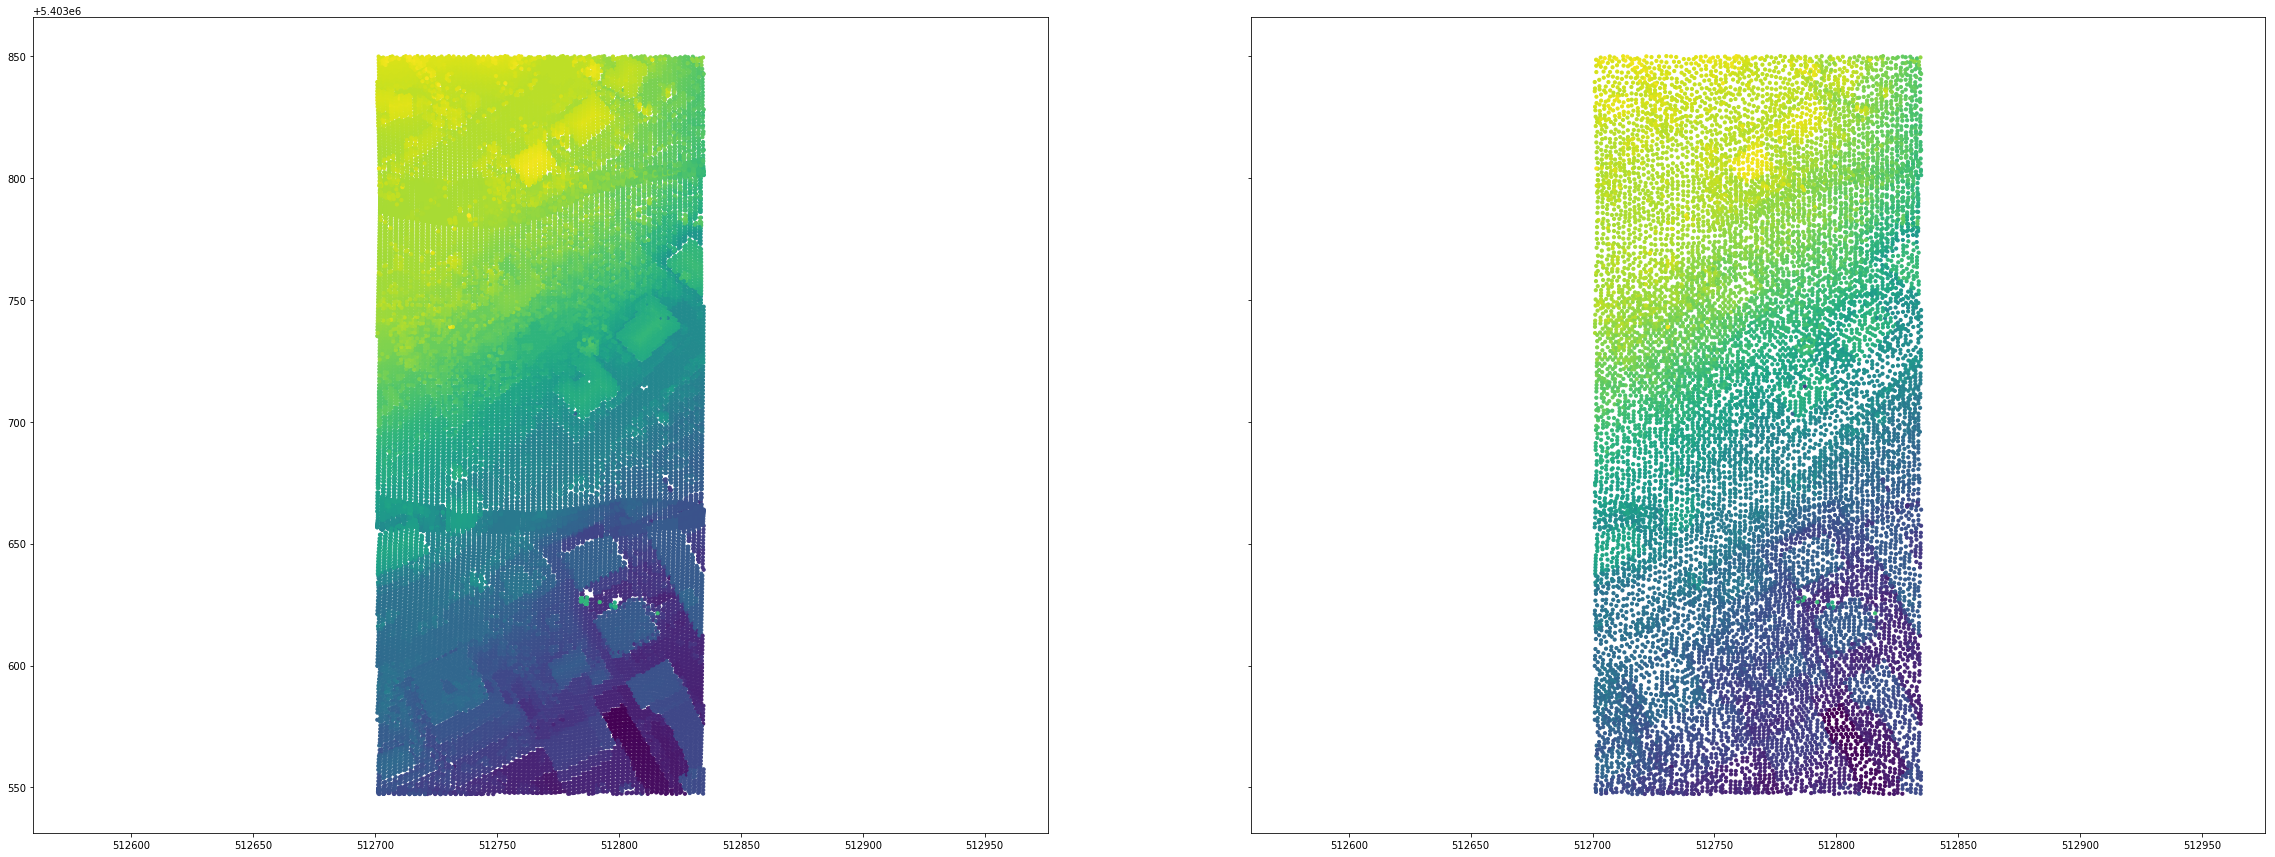

In [79]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 15), sharey=True, subplot_kw=dict(aspect='equal'))
ax1.scatter(before['X'], before['Y'], c=before['Z'], cmap='viridis', s=10);
ax2.scatter(after['X'], after['Y'], c=after['Z'], cmap='viridis', s=10);

<h2 align="center">Filter-only Pipelines</h2>

We can now do filter-only pipelines. Why is that important? Well, you could always create the pipeline, and do substitution:

`pdal pipeline pipeline.json \
     --readers.las.filename=input.las \
     --writers.las.filename=output.las`

Is now.

`pdal translate input.las output.las \
    --json pipeline.json`

@chambbj, @DigitalGlobe, @RadiantBlueTech, @pointcloudpipe

* https://chambbj.github.io
* https://www.digitalglobe.com/expertise
* https://pdal.io

<h2 align="center">Possible comparison to earlier voxel grid</h2>

In [68]:
%matplotlib inline
import pdal
import matplotlib.pyplot as plt
import numpy as np
json = u'''
{
  "pipeline":[
    "./data/isprs/samp11-utm.laz",
    {
      "type":"filters.sample",
      "radius":1.41
    }
  ]
}'''

p = pdal.Pipeline(json)
p.validate()
count = p.execute()
poisson = p.arrays[0]
    
json = u'''
{
  "pipeline":[
    "./data/isprs/samp11-utm.laz"
  ]
}'''

p = pdal.Pipeline(json)
p.validate()
count = p.execute()
before = p.arrays[0]
after = poisson

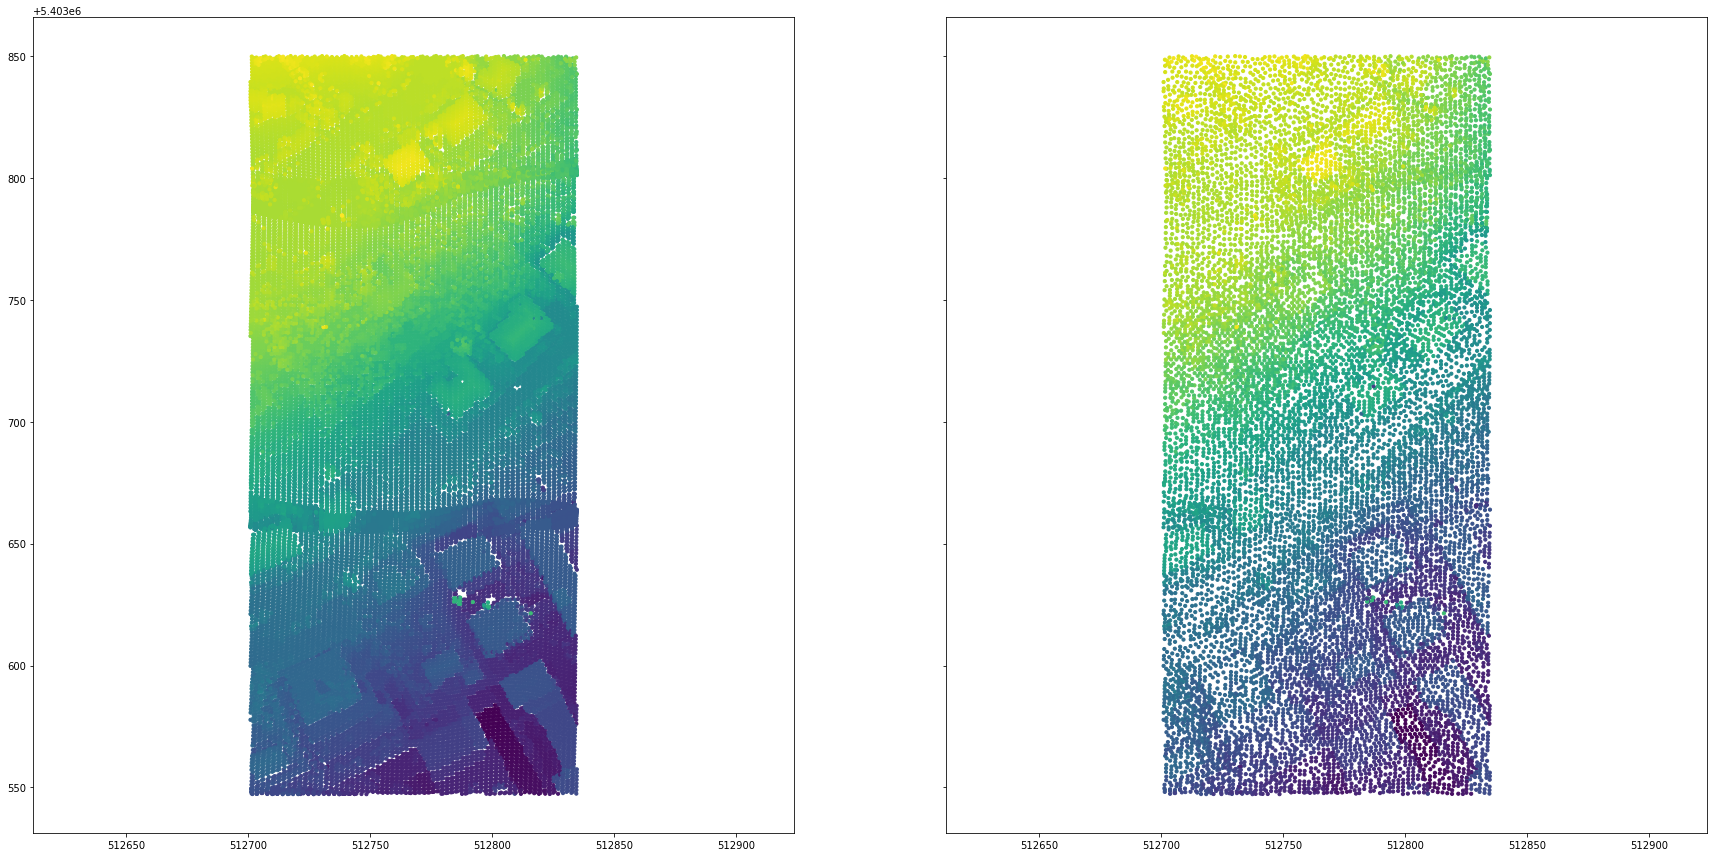

In [76]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15), sharey=True, subplot_kw=dict(aspect='equal'))
ax1.scatter(before['X'], before['Y'], c=before['Z'], cmap='viridis', s=10);
ax2.scatter(after['X'], after['Y'], c=after['Z'], cmap='viridis', s=10);

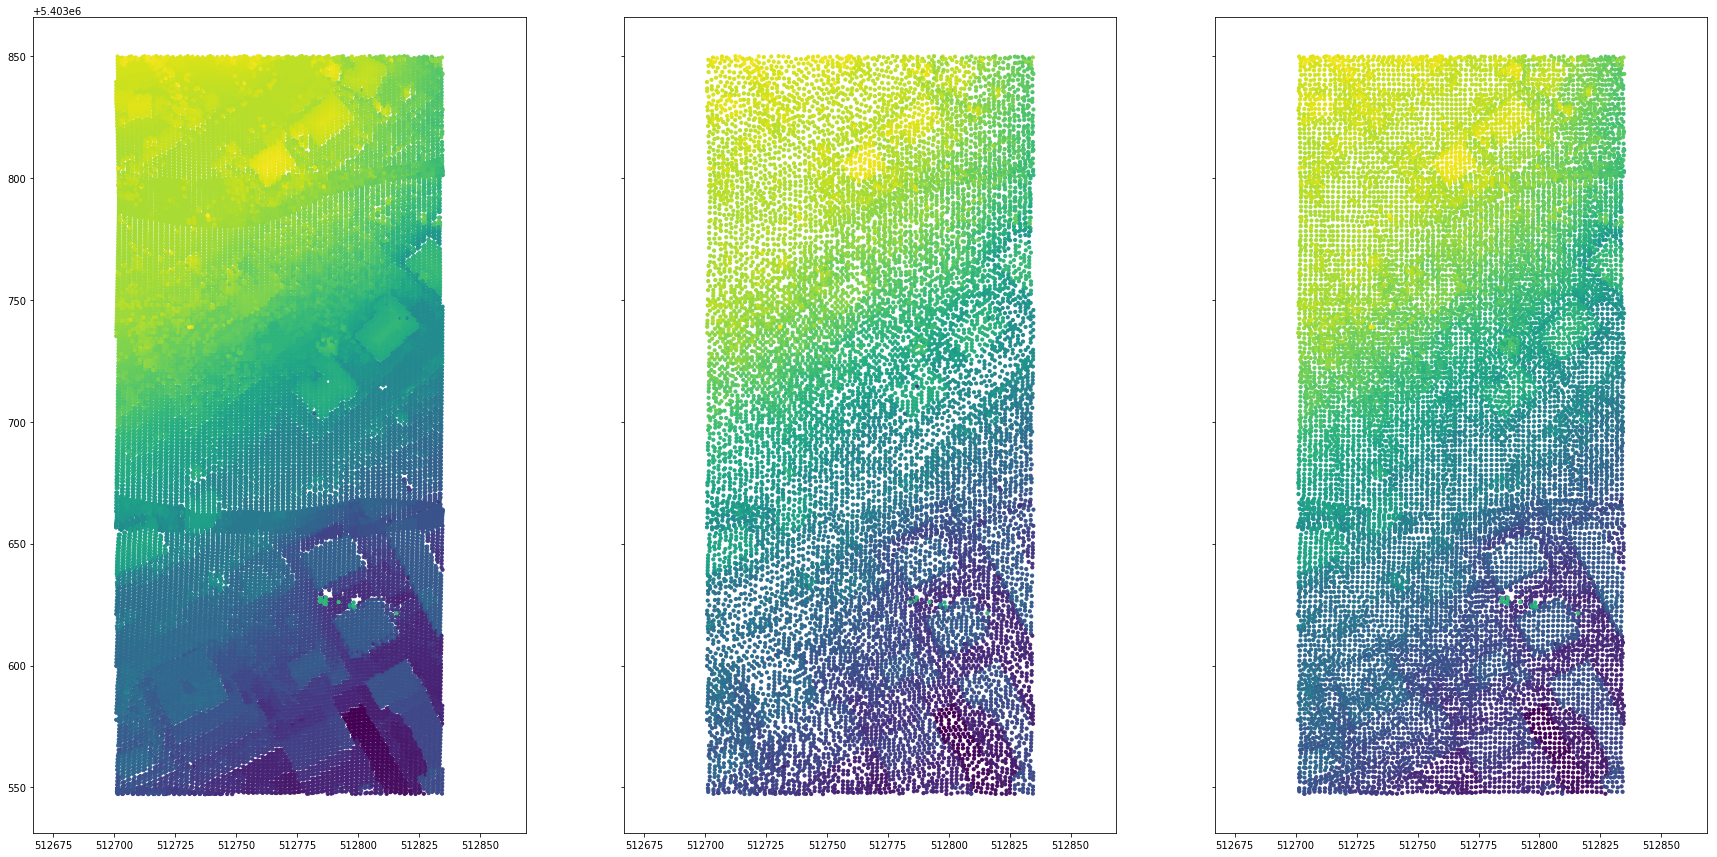

In [74]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 15), sharey=True, subplot_kw=dict(aspect='equal'))
ax1.scatter(before['X'], before['Y'], c=before['Z'], cmap='viridis', s=10);
ax2.scatter(poisson['X'], poisson['Y'], c=poisson['Z'], cmap='viridis', s=10);
ax3.scatter(vg['X'], vg['Y'], c=vg['Z'], cmap='viridis', s=10);